In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
ls data

men_shoes.csv


In [6]:
df = pd.read_csv('data/men_shoes.csv', low_memory = False)
df.shape

(18280, 48)

In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])

In [9]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

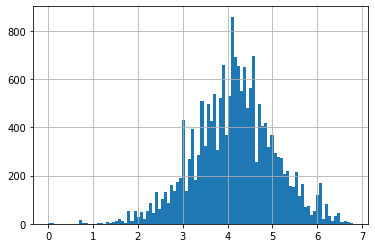

In [11]:
np.log(df['prices_amountmin']+1).hist(bins=100);

In [14]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [15]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
df['prices_merchant_cat'] = df['prices_merchant'].factorize()[0]

In [27]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth = 5)

scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [29]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [52]:
run_model(['brand_cat', 'prices_issale', 'prices_merchant_cat'])

(-57.759261048983944, 4.027591430267973)

In [0]:
  !git config --global user.email "elzbieta.doniek@gmail.com"
  !git config --global user.name "Elzbieta"

In [0]:
!git add matrix_one/Day4.ipynb

In [65]:
!git commit -m"Read Men's shoe prices dataset from data.world"

[master 4d9dc75] Read Men's shoe prices dataset from data.world
 2 files changed, 2 insertions(+), 1 deletion(-)
 rewrite matrix_one/Day3.ipynb (97%)
 create mode 100644 matrix_one/Day4.ipynb


In [66]:
!git push -u origin master

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 8.04 KiB | 823.00 KiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/ElzbietaDoniek/dw_matrix.git
   1844944..4d9dc75  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
